# EM algorithms

EM algorithm is a probabilistic clustering algorithm. Given a data set $\{\mathbf{x}\}$, which are suspected to be generated from parameters $\mathbf{\Theta}$, EM algorithm takes advantage of latent variables $\{\mathbf{h}\}$, whose distribution is $q(\{\mathbf{h}\})$ to maximize the likelihood $p(\{\mathbf{x}\}|\mathbf{\Theta})$. As we do not know correct $\mathbf{\Theta}$, we are not able to simply compute the posterior $p(\{\mathbf{h}\}| \{\mathbf{x}\},\mathbf{\Theta})$ to obtain the optimal $q(\{\mathbf{h}\})$.

The EM algorithm maximize the likilihood $p(\{\mathbf{x}\}|\mathbf{\Theta})$ by maximizing a function $B(q(\{\mathbf{h}\},\mathbf{\Theta})$ iteratively. 

(1) E-step:

finding the optimal distribution $q(\{\mathbf{h}\})$ for a given $\mathbf{\Theta}$, which is equivalent to computing the posterior $p(\{\mathbf{h}\}|\{\mathbf{x}\},\mathbf{\Theta})$

(2) M-step:

finding the optimal $\mathbf{\Theta}$ for a given $q(\{\mathbf{h}\})$, which is equivalent to finding $\mathbf{\Theta}$ that maximizes the marginalized likelihood $argmax_{\Theta} \int d\{\mathbf{h}\} \, q(\{\mathbf{h}\})\,log\,p(\{\mathbf{x}\} \{\mathbf{h}\}|\Theta)$ using $q(\{\mathbf{h}\})$ obtained in the E-step.

The iterations should continue until the marginalized likelihood saturates.

Here,

$B(q(\{\mathbf{h}\},\mathbf{\Theta}) = p(\{\mathbf{x}\}|\mathbf{\Theta}) - D_{KL}\big(q(\{\mathbf{h}\}), p(\{\mathbf{h}\}, \{\mathbf{x}\}|\mathbf{\Theta})\big)$.

$D_{KL}\big(q(\{\mathbf{h}\}), p(\{\mathbf{x}\}, \{\mathbf{h}\}|\mathbf{\Theta})\big) > 0$ is the Kullback-Leibler divergence between $q(\{\mathbf{h}\})$ and $p(\{\mathbf{h}\}, \{\mathbf{x}\}|\mathbf{\Theta})$.

Once we've found the optimal $q(\{\mathbf{h}\}$ and $\mathbf{\Theta}$, if they're correct, the second term vanishes as $q(\{\mathbf{h}\} = p(\{\mathbf{h}\}|\{\mathbf{x}\},\mathbf{\Theta})$ and the first term, the likelihood $p(\{\mathbf{x}\}|\mathbf{\Theta})$, has been maximized.

## Table of contents:
* [Generalities](#generalities)
* [Theory - Gaussian Mixture (discrete mixture)](#theory_d1d)
* [Implementation - Gaussian Mixture (discrete mixture, 1D)](#implementation_d1d)
* [Implementation - Gaussian Mixture (discrete mixture, 2D)](#implementation_d2d)
* [Theory - Gaussian Mixture (continuous mixture in covariance)](#theory_cc2d)
* [Implementation - Gaussian Mixture (continuous mixture in covariance)](#implementation_cc2d)
* [Theory - Gaussian Mixture (continuous mixture in mean) AKA Factor Analysis ](#theory_cm2d")
* [Implementation - Gaussian Mixture (continuous mixture in mean) in 2D](#implementation_cm2d)
* [Theory : Discrete Student's-T Mixture ](#theory_stmd")
* [I Implementation : Discrete Student's-T Mixture in 2D ](#implementation_stmd)

# Theory : Gaussian Mixture (discrete mixture) <a class="anchor" id="theory_d1d"></a>

We consider the case of discrete mixtures of multivariate gaussians. The gaussians have in general different means and covariances. Employing a hidden (latent) variable, $h_{i} \in {1, 2,\cdots, K}$. We can express the mixture as a marginalization.

$$\begin{align}
p(x_{i}|\Theta) \quad & = &\quad  \sum_{h_{i}=1}^{K} p(x_{i}|h_{i}, \Theta) p(h_{i}|\Theta) \\
\quad & = &\quad \sum_{h_{i}=1}^{K}\bigg(\prod_{k=1}^{K} \lambda_{k}^{\delta_{h_{i}k}}\bigg)Norm_{\mathbf{x}_{i}}(\mu_{h_{i}}, \Sigma_{h_{i}}) \\
\quad & = &\quad \sum_{k=1}^{K} \lambda_{k}Norm_{\mathbf{x}_{i}}(\mu_{k}, \Sigma_{k})\\
\end{align}$$
<br>
, where
<br>
$$\begin{align}
p(x_{i}|h_{i}, \Theta) \quad & = &\quad Norm_{\mathbf{x}_{i}}(\mu_{h_{i}}, \Sigma_{h_{i}}) \quad & = & \quad \frac{1}{\sqrt{(2\pi)^{d}|\Sigma|}}exp\bigg(-\frac{1}{2}(\mathbf{x}_{i} - \mathbf{\mu}_{h_{i}})^{T}\Sigma_{h_{i}}^{-1} (\mathbf{x}_{i} - \mathbf{\mu}_{h_{i}})\bigg)\\
p(h_{i}|\Theta) \quad & = & \quad Cat_{h_{i}}(\mathbf{\lambda}) \quad & = & \quad \prod_{k=1}^{K} \lambda_{k}^{\delta_{h_{i}k}} \qquad \bigg(\sum_{k=1}^{K} \lambda_{k} = 1 \bigg)
\end{align}$$
Here, we employed Kronecker's delta $\delta_{h_{i},k}$ which is $1$ only if $h_{i}=k$ and $0$ otherwise. Often, in the explanations on the disctrete gaussian mixtures, the role of hidden variable or latent variable ($h_{i}$) is somewhat less clear why one has to resort to introduce the latent variable. Here, we expressed the categorical distribution in a form that the marginalization via discrete $h_{i}$ manifests explicitly. $r_{ik, n}$ in the following means means "the responsiblity of class $k$ for sample $i$ at $n$th step".
<br>
<br>

E-step:
<br>
<br>
$$\begin{align}
q_{i}(h_{i, n + 1}) \quad & = & \quad p(h_{i, n}|x_{i}, \Theta_{n}) \\
& = & \quad  \frac{p(x_{i}|h_{i, n}, \Theta_{n})p(h_{i, n}|\Theta_{n})}{\sum_{k=1}^{K}p(x_{i}|h_{i, n}, \Theta_{n})p(h_{i, n}|\Theta_{n})}\\
& = & \quad \frac{\big(\prod_{k=1}^{K} \lambda_{k}^{\delta_{h_{i,n}k}}\big)Norm_{\mathbf{x}_{i}}(\mu_{h_{i,n}}, \Sigma_{h_{i,n}})}{\sum_{k=1}^{K}\lambda_{k, n}Norm_{\mathbf{x}_{i}}(\mu_{k, n}, \Sigma_{k, n})}\\
\Rightarrow \quad q_{i}(h_{i, n + 1} = k) \quad & = & \quad \frac{\lambda_{k} Norm_{\mathbf{x}_{i}}(\mu_{k, n}, \Sigma_{k, n})}{\sum_{k=1}^{K}\lambda_{k, n}Norm_{\mathbf{x}_{i}}(\mu_{k, n}, \Sigma_{k, n})}\\
\quad & := & \quad r_{ik, n}
\end{align}$$
<br>
M-step:
<br>
<br>
$$\begin{align}
\lambda_{k, n + 1}  \quad & = & \quad \frac{\sum_{i=1}^{N}r_{ik, n}}{\sum_{k=1}^{K}\sum_{i=1}^{N}r_{ik, n}}\\
\mu_{k, n + 1}  \quad & = & \quad \frac{\sum_{i=1}^{N}r_{ik, n}x_{i}}{\sum_{i=1}^{N}r_{ik, n}} \\
\Sigma_{k, n + 1}  \quad & = & \quad \frac{\sum_{i=1}^{N}r_{ik, n}(\mathbf{x}_{i} - \mu_{k, n})^{T}(\mathbf{x}_{i} - \mu_{k, n})}{\sum_{i=1}^{N}r_{ik, n}} \\
\end{align}$$

#  Implementation : Gaussian Mixture (discrete mixture, 1D) <a class="anchor" id="implementation_d1d"></a>

In [4]:
import numpy as np
import scipy.stats as spst
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def timer(func):
    def inner_func(*args, **kwargs):
        current_time = time.time()
        result = func(*args, **kwargs)
        print("Request took {:.1f}s".format(time.time()-current_time))
        return result
    return inner_func

L_true -1.7823975541


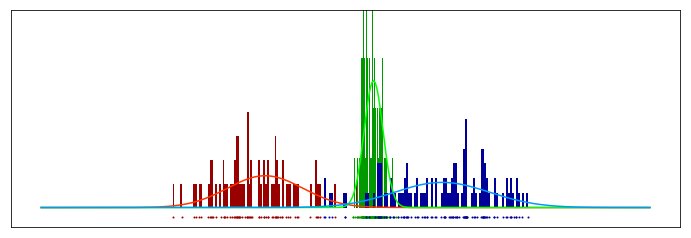

In [5]:
# synthesize a data set
nm = 3    # number of mixed gaussian. Here, we set it to 3.
ns = 300  # number of samples.

mu = 20 * (np.random.rand(nm) - 0.5)     # mean
sg = 3 * (np.random.rand(nm) + 0.1)      # std
lm = (np.random.rand(nm) + 0.1)          # lambda, coming from the categorical distribution
lm /= lm.sum()                           # normalize
lm_ind = np.round(np.cumsum(lm) * ns).astype(int) # divide the samples according to the ratio
lm_ind = np.insert(lm_ind, 0, 0)

smp = np.zeros(ns)
gs_true = np.zeros(ns)
x = np.linspace(-20,20,400)

# plot the generated data set
clrs1 = [(0.6, 0, 0), (0, 0.6, 0), (0, 0, 0.6)]
clrs2 = [(1, 0.2, 0), (0, 1, 0), (0, 0.6, 1)]
plt.figure(figsize=(12,4))
plt.clf()
for k in range(nm):
    this_smp = np.random.normal(mu[k], sg[k], lm_ind[k+1] - lm_ind[k])
    smp[lm_ind[k]:lm_ind[k + 1]] = this_smp
    gs_true[lm_ind[k]:lm_ind[k + 1]] = spst.norm(mu[k], sg[k]).pdf(this_smp)
    plt.plot(this_smp, -0.05*np.ones(this_smp.shape), '.', color=clrs1[k], markersize=2) # 1D representation
    plt.hist(this_smp, 100, normed=1, color=clrs1[k]) # histogram representation
    plt.plot(x, spst.norm(mu[k], sg[k]).pdf(x), color=clrs2[k]) # true distribution
    plt.yticks([])
    plt.xticks([])
    plt.ylim((-0.1, 1.0))

L_true = np.log(gs_true).sum() / ns # average log likelihood
print('L_true', L_true)


L_true -1.7823975541


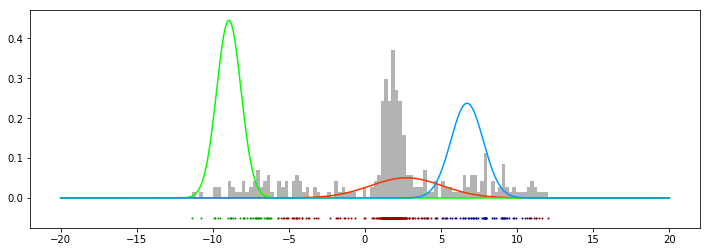

In [27]:
# initial values for the EM algortihm
mue = 20 * (np.random.rand(nm) - 0.5)
sge = 3 * (np.random.rand(nm) + 0.1)
lme = (np.random.rand(nm) + 0.1)
lme /= lm.sum()

gs = np.zeros((nm, ns))
for k in range(nm):
    gs[k,:] = lme[k] * spst.norm(mue[k], sge[k]).pdf(smp)
r = gs/gs.sum(axis=0)

# plot the initial state
clrs1 = [(0.6, 0, 0), (0, 0.6, 0), (0, 0, 0.6)]
clrs2 = [(1, 0.2, 0), (0, 1, 0), (0, 0.6, 1)]
plt.figure(figsize=(12,4))
plt.clf()
plt.hist(smp, 100, normed=1, color=(0.7, 0.7, 0.7))
for i in range(ns):
    cl = (clr*r[0, i], clr*r[1, i], clr*r[2, i])
    plt.plot(smp[i], -0.05, '.', color=cl, markersize=2)
for k, c in zip(range(nm), clrs):
    plt.plot(x, lme[k] * spst.norm(mue[k], sge[k]).pdf(x), color=clrs[k])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylim((-0.1, 0.5))
    ax.set_title('E-step : %d' % (rep + 1))

L_true = np.log(gs_true).sum() / ns # average log likelihood
print('L_true', L_true)

L_infer = -3.607417 , L_true = -1.782398
L_infer = -2.963255 , L_true = -1.782398
L_infer = -2.916258 , L_true = -1.782398
L_infer = -2.876391 , L_true = -1.782398
L_infer = -2.831779 , L_true = -1.782398
L_infer = -2.787445 , L_true = -1.782398
L_infer = -2.751467 , L_true = -1.782398
L_infer = -2.724829 , L_true = -1.782398
L_infer = -2.701103 , L_true = -1.782398
L_infer = -2.679200 , L_true = -1.782398
L_infer = -2.662259 , L_true = -1.782398
L_infer = -2.651187 , L_true = -1.782398


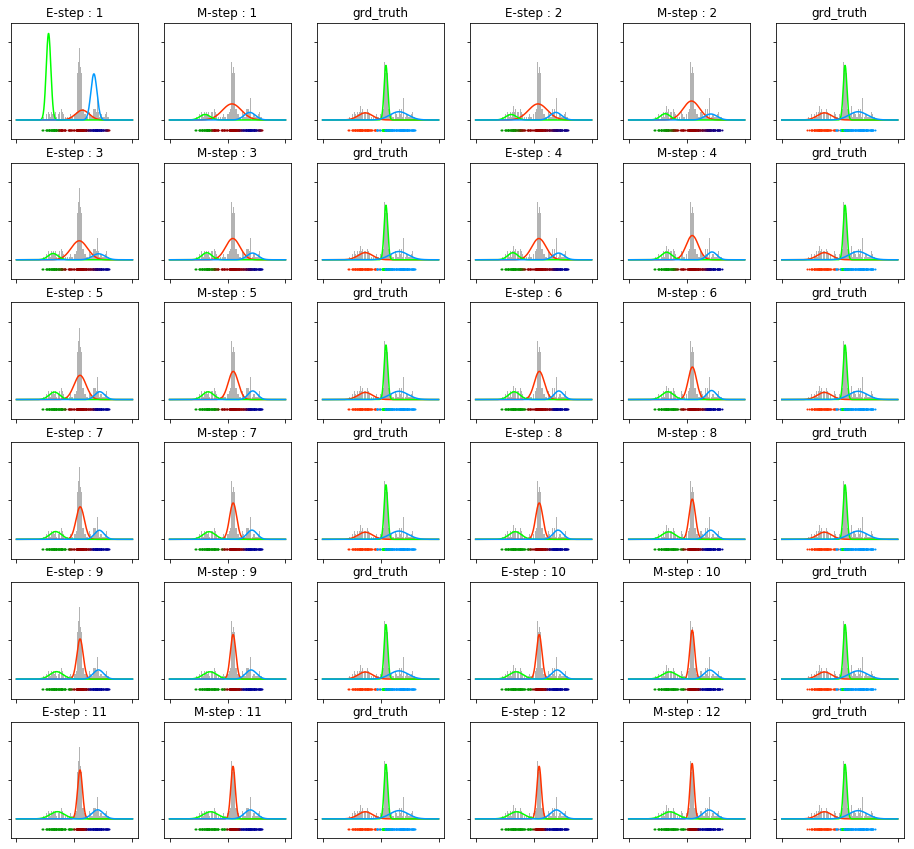

In [28]:
plt.figure(figsize=(16.0, 15.0))
plt.clf()
clr = 0.6
clrs = [(1, 0.2, 0), (0, 1, 0), (0, 0.6, 1)]

# usually the repetition is terminated once the log likelihood saturates.
# For the sake of plotting every step, I use a for loop instead of a while loop.
Nrep = 12
for rep in range(Nrep):
    
    # E-step
    gs = np.zeros((nm, ns))
    for k in range(nm):
        gs[k,:] = lme[k] * spst.norm(mue[k], sge[k]).pdf(smp)
    r = gs/gs.sum(axis=0)
    ax = plt.subplot(Nrep/2, 6, 1 + 3 * rep + 0)
    plt.hist(smp, 100, normed=1, color=(0.7, 0.7, 0.7))
    for i in range(ns):
        cl = (clr*r[0, i], clr*r[1, i], clr*r[2, i])
        plt.plot(smp[i], -0.05, '.', color=cl, markersize=2)
    for k, c in zip(range(nm), clrs):
        plt.plot(x, lme[k] * spst.norm(mue[k], sge[k]).pdf(x), color=clrs[k])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_ylim((-0.1, 0.5))
        ax.set_title('E-step : %d' % (rep + 1))

    # M-step
    lme = r.sum(axis=1)/r.sum()
    sge = np.sqrt((r*((np.tile(smp, (nm,1)) - mue[:,np.newaxis])**2)).sum(axis=1)/r.sum(axis=1))
    mue = (r * smp).sum(axis=1)/r.sum(axis=1)
    ax = plt.subplot(Nrep/2, 6, 1 + 3 * rep + 1)
    plt.hist(smp, 100, normed=1, color=(0.7, 0.7, 0.7))
    for i in range(ns):
        cl = (clr*r[0, i], clr*r[1, i], clr*r[2, i])
        plt.plot(smp[i], -0.05, '.', color=cl, markersize=2)
    for k, c in zip(range(nm), clrs):
        plt.plot(x, lme[k] * spst.norm(mue[k], sge[k]).pdf(x), color=clrs[k])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_ylim((-0.1, 0.5))
        ax.set_title('M-step : %d' % (rep + 1))
    
    # plot the ground truth for a comparison
    ax = plt.subplot(Nrep/2, 6, 1 + 3 * rep + 2)
    plt.hist(smp, 100, normed=1, color=(0.7, 0.7, 0.7))    
    for k in range(nm):
        plt.plot(smp[lm_ind[k]:lm_ind[k + 1]], -0.05*np.ones(lm_ind[k + 1] - lm_ind[k]), '.', color=clrs[k], markersize=2)
        plt.plot(x, lm[k] * spst.norm(mu[k], sg[k]).pdf(x), color=clrs[k])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_ylim((-0.1, 0.5))
        ax.set_title('grd_truth')
    
    # update the average log likelihood
    L_infer = np.log(gs.sum(axis=0)).sum() / ns # average log likelihood
    print('L_infer = %2.6f , L_true = %2.6f' % (L_infer, L_true))